In [227]:
import pandas as pd
import os
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# unzip
# rename "W36_Jun 18" to "W36_Jun18"

# need to save all static plot to data visualization folder, but how about the interective plot? 
# is there a way to import variable in other folder? 

In [2]:
df = pd.read_spss("/Users/qingyi/Documents/uchicago/courses/data_programming_for_public_policy_2/Political_Polarization/data/public opinion/W10_Mar15/ATP W10.sav")

In [15]:
print(df.columns[0:50])

Index(['QKEY', 'NEW_Device_Type_W10', 'LANG_W10', 'MIP_W10OE_1', 'MIP_W10OE_2',
       'MIP_W10OE_3', 'GEN_INT_A_W10', 'GEN_INT_B_W10', 'GEN_INT_C_W10',
       'GEN_INT_D_W10', 'GEN_INT_E_W10', 'GEN_INT_F_W10', 'GEN_INT_G_W10',
       'GEN_INT_H_W10', 'GEN_INT_I_W10', 'GEN_INT_J_W10', 'GEN_INT_K_W10',
       'GEN_INT_L_W10', 'GEN_INTREF_W10', 'TRUST_NHBR_W10', 'LOCALELECT_W10',
       'PARTICIPATE_A_W10', 'PARTICIPATE_B_W10', 'PARTICIPATE_C_W10',
       'LIBRARY1_W10', 'LIBRARY2_W10', 'THOUGHT_W10', 'GEN1_A_W10',
       'GEN1_B_W10', 'GEN1_C_W10', 'GEN1_D_W10', 'GEN1_E_W10', 'GEN1_F_W10',
       'GEN1REF_W10', 'GEN2_A_W10', 'GEN2_B_W10', 'GEN2_C_W10', 'GEN2_D_W10',
       'GEN2_E_W10', 'GEN2_F_W10', 'GEN3A_W10', 'GEN3B_W10', 'GEN3C_W10',
       'GEN3D_W10', 'GEN3E_W10', 'GEN4_1_W10', 'GEN4_2_W10', 'GEN4_3_W10',
       'GEN4_4_W10', 'GEN4_5_W10'],
      dtype='object')


['Moderate', 'Conservative', 'Liberal', 'Very conservative', 'Very liberal', 'Don’t know/Refused']
Categories (6, object): ['Conservative', 'Don’t know/Refused', 'Liberal', 'Moderate', 'Very conservative', 'Very liberal']

In [22]:
os.getcwd()

'/Users/qingyi/Documents/uchicago/courses/data_programming_for_public_policy_2/Political_Polarization/data/public opinion'

In [25]:
os.listdir()

['W10_Mar15',
 'W19_Jul16',
 'W24_Jan17',
 'W35_May18',
 'W30_Dec17',
 'W20_Aug16',
 'W36_Jun 18',
 '.DS_Store',
 'W38_Sep18',
 'W40_Nov18',
 'W21_Sep16',
 'W14.5_Diary16',
 'W23_Nov16',
 'public_opinion.ipynb',
 'W17_May16',
 'W26_Apr17',
 'W22_Oct16',
 'W39_Nov18',
 'W31_Feb18',
 'W27_May17',
 'W41_Dec18',
 'W14_Jan16',
 '.ipynb_checkpoints',
 'W32_Feb18',
 'W37_Jul18',
 'W18_Jun16',
 'W34_Apr18',
 'W15_Mar16',
 'W16_Apr16',
 'W28_Aug17',
 'W33_Mar18',
 'W29_Sep17',
 'W13_Dec15']

In [226]:
# delete W14.5_Diary16
time_list = []
polarity_list = []

def convert_time(fname): 
    time = folder
    time = re.sub('W10|W13', '2015', time)
    time = re.sub('W14|W15|W16|W17|W18|W19|W20|W21|W22|W23', '2016', time)
    time = re.sub('W24|W26|W27|W28|W29|W30', '2017', time)
    time = re.sub('W31|W32|W33|W34|W35|W36|W37|W38|W39|W40|W41', '2018', time)
    time = datetime.strptime(time, '%Y_%b%d').date()
    return time

for folder in os.listdir(): 
    if folder.startswith('W'): 
        time = convert_time(folder)
        time_list.append(time)
        for file in os.listdir(folder): 
            if file.endswith(".sav"): 
                df = pd.read_spss(os.path.join(folder, file))
                # get_ideo(df)
                polarity = get_polarity(df)
                polarity_list.append(polarity)


          Time  Polarity
0   2015-03-15  0.383233
28  2015-12-15  0.415567
18  2016-01-16  0.415750
23  2016-03-16  0.416136
24  2016-04-16  0.415792
11  2016-05-16  0.418773
21  2016-06-16  0.415995
1   2016-07-16  0.415005
6   2016-08-16  0.417643
9   2016-09-16  0.419398
13  2016-10-16  0.417803
10  2016-11-16  0.417766
3   2017-01-17  0.417493
12  2017-04-17  0.416266
16  2017-05-17  0.415595
25  2017-08-17  0.430163
27  2017-09-17  0.431885
5   2017-12-17  0.431550
19  2018-02-18  0.419334
15  2018-02-18  0.432751
26  2018-03-18  0.409783
22  2018-04-18  0.410004
4   2018-05-18  0.433415
2   2018-06-18  0.433918
20  2018-07-18  0.432726
7   2018-09-18  0.406459
8   2018-11-18  0.406202
14  2018-11-18  0.407391
17  2018-12-18  0.386419


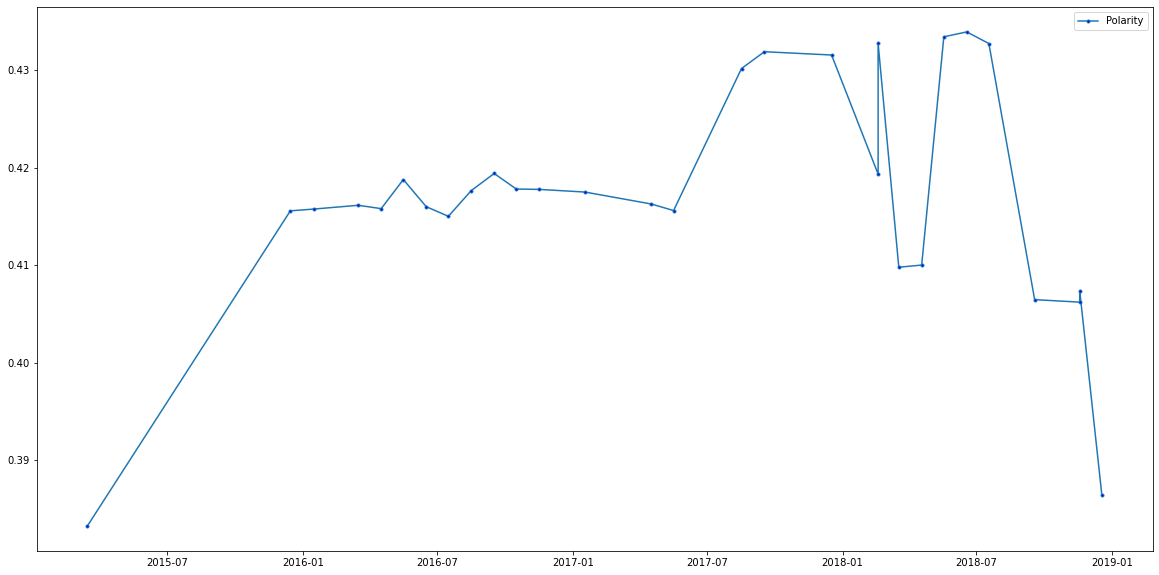

In [229]:
def draw_polarity_change_table(data): 
    polarity_change = pd.DataFrame(data)
    polarity_change = polarity_change.sort_values(by='Time')
    return polarity_change

data = {'Time': time_list, 'Polarity': polarity_list}
polarity_change = draw_polarity_change_table(data)
# save table

def draw_change(df): 
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)
    plt.plot( 'Time', 'Polarity', data=df, marker='.', markerfacecolor='blue')
    plt.legend()
    # plt.savefig(f"{path}/homework-3-cindyheqy-1/question1_plot.png")

draw_change(polarity_change)

In [209]:
f = "W12_a1"
f = re.sub('W[0-9|_]+', '1', f)
f[:-1]

'1a'

In [189]:
# def get_weight(df): 
#     if df['F_IDEO_FINAL']
weight = {'Moderate': 0, 
    'Conservative': -0.5, 
    'Liberal': 0.5, 
    'Very conservative': -1, 
    'Very liberal': 1, 
    'Don’t know/Refused': 0}
df['ideo_weight'] = 0
for i in range(5): 
    df['ideo_weight'][i] = weight[df['F_IDEO_FINAL'][i]]
# df.head()
# 建一张新的表，分别是ideology，weight和count（人数），
# 然后算一个polarity的数值，用所有的数值编成另一张表格
# 可以用来画每一年一张图（）

KeyError: 'F_IDEO_FINAL'

In [190]:
df = pd.read_spss("/Users/qingyi/Documents/uchicago/courses/data_programming_for_public_policy_2/Political_Polarization/data/public opinion/W41_Dec18/ATP W41.sav")
df.head(5)

,QKEY,NEW_Device_Type_W41,F_LANGUAGE,FORM_W41,OPTIMIST_W41,AVGFAM_W41,HAPPENa_W41,HAPPENb_W41,HAPPENc_W41,HAPPENd_W41,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_INTUSER,F_VOLSUM,WEIGHT_W41
0,100363.0,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Democrat,NaN,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006
1,101224.0,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Republican,NaN,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981
2,101437.0,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,Republican,NaN,Rep/Lean Rep,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871
3,102130.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Independent,Refused,DK/Refused/No lean,Refused,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058
4,103094.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,Something else,Refused,DK/Refused/No lean,"$20,000 to less than $30,000","<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465


In [ ]:
df = pd.read_spss("/Users/qingyi/Documents/uchicago/courses/data_programming_for_public_policy_2/Political_Polarization/data/public opinion/W10_Mar15/ATP W10.sav")

In [197]:
def get_ideo(df):
    df['count'] = 0
    if 'F_IDEO_FINAL' in df.columns: 
        df_ideo = df.groupby('F_IDEO_FINAL').count()['count']
        # print(df_ideo.index)
    elif 'F_IDEO' in df.columns:
        df_ideo = df.groupby('F_IDEO').count()['count']
        # print(df_ideo.index)

    df_ideo = df_ideo.to_frame() 
    df_ideo.loc['Moderate', 'weight'] = 0
    df_ideo.loc['Conservative', 'weight'] = -0.5
    df_ideo.loc['Liberal', 'weight'] = 0.5
    df_ideo.loc['Very conservative', 'weight'] = -1
    df_ideo.loc['Very liberal', 'weight'] = 1
    df_ideo['count*weight'] = df_ideo['count'] * df_ideo['weight']
    # if 'Don’t know/Refused' in list(df_ideo.index): 
    #     df_ideo = df_ideo.drop('Don’t know/Refused')
    df_ideo = df_ideo.dropna()
    
    return df_ideo

In [ ]:
def get_polarity(df): 
    df_ideo = get_ideo(df)
    polarity = ((abs(df_ideo['count*weight'])).sum())/df_ideo['count'].sum()
    return polarity

In [195]:
get_ideo(df)

CategoricalIndex(['Conservative', 'Liberal', 'Moderate', 'Refused',
                  'Very conservative', 'Very liberal'],
                 categories=['Conservative', 'Liberal', 'Moderate', 'Refused', 'Very conservative', 'Very liberal'], ordered=False, dtype='category', name='F_IDEO')


,count,weight,count*weight
F_IDEO,,,
Conservative,575,-0.5,-287.5
Liberal,480,0.5,240.0
Moderate,977,0.0,0.0
Very conservative,206,-1.0,-206.0
Very liberal,214,1.0,214.0


In [ ]:
list(get_ideo(df).index)


['Conservative', 'Liberal', 'Moderate', 'Very conservative', 'Very liberal']

In [ ]:
get_polarity(df)

0.3832325803372574